In [2]:
import geopandas as gpd
from igraph import Graph
import pandas  as pd
import numpy as np

#Coleta dados dos arquivos 
graph = Graph.Read_GraphML("Datas/networks/grafo_Peso_Geral.GraphML")
#primeiro_vertice = graph.vs[0]




C:\Users\romul\AppData\Local\Temp\ipykernel_17404\4223496629.py:7: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:485
  graph = Graph.Read_GraphML("Datas/networks/grafo_Peso_Geral.GraphML")


In [3]:

# Obtém os geocódigos, LONG e LATI
geocodes = list(map(int, graph.vs["geocode"]))
longitudes = graph.vs["LONG"]
latitudes = graph.vs["LATI"]

# Calcula métricas do grafo
degrees = graph.degree()
clustering = graph.transitivity_local_undirected()
weighted_strength = graph.strength(weights="weight")
graph.es['w_inv'] = 1.0 / np.array(graph.es['weight'])
weighted_betweenness = graph.betweenness(vertices=None, directed=False, cutoff=None, weights='w_inv')
weighted_closeness = graph.closeness(vertices=None, mode='all', cutoff=None, weights='w_inv', normalized=True)
weighted_eignv = graph.evcent(directed=False, scale=True, weights='w_inv', return_eigenvalue=False)


# Cria um DataFrame com os dados
metrics_df = pd.DataFrame({
    "geocode": geocodes,
    "LONG": longitudes,
    "LATI": latitudes,
    "degree": degrees,
    "clustering": clustering,
    "Weighted_strength": weighted_strength,
    "Weighted_betweenness": weighted_betweenness,
    "Weighted_closeness": weighted_closeness,
    "Weighted_eignv": weighted_eignv
})



In [4]:
#Cria coluna ponto
from shapely.geometry import Point
metrics_df['geometry'] = None
for index,row in metrics_df.iterrows():
    metrics_df.loc[index,'geometry']=Point(row.LONG,row.LATI)


In [6]:
gdf_metrics = gpd.GeoDataFrame(metrics_df,geometry='geometry')

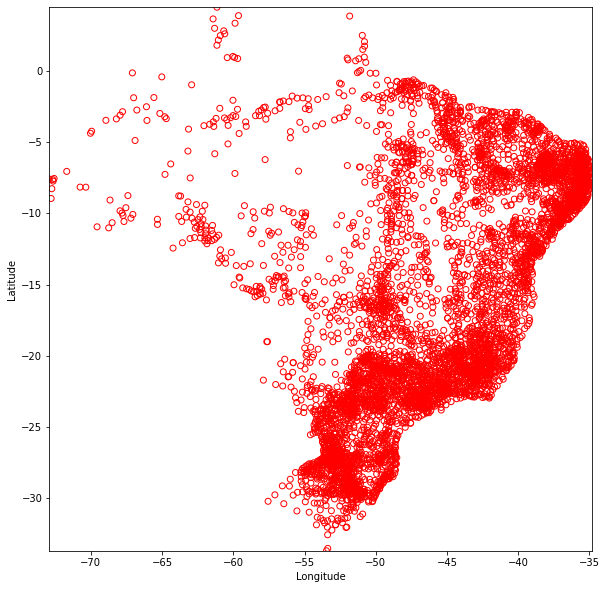

In [7]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 10))
gdf_metrics.plot(ax=ax, color='none', edgecolor='red')
# Latex font --------------------

# -------------------------------
# Ajuste dos limites do eixo para enquadrar as geometrias
ax.set_xlim(gdf_metrics.total_bounds[0], gdf_metrics.total_bounds[2])
ax.set_ylim(gdf_metrics.total_bounds[1], gdf_metrics.total_bounds[3])
# Configuração dos rótulos dos eixos
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('Datas/results/Map_Cities.png')
    # Close the plot to release resources
plt.show()

1461
1


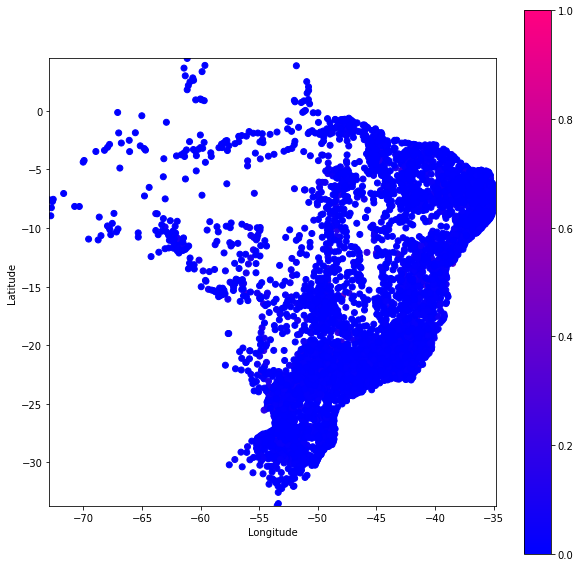

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Suponha que você tenha um DataFrame chamado metrics_df contendo todas as métricas

# Lista de métricas a serem plotadas
metricas = ['degree']

# Loop para gerar mapas para cada métrica
for metrica in metricas:
    gdf_metrics = gpd.GeoDataFrame(metrics_df, geometry='geometry')
    
    # Normaliza os valores da métrica Weighted_closeness entre 0 e 1
    min_metrica = gdf_metrics[metrica].min()
    max_metrica = gdf_metrics[metrica].max()
    print(max_metrica)
    print(min_metrica)
    normalized_metrica = (gdf_metrics[metrica] - min_metrica) / (max_metrica - min_metrica)

    # Cores ajustadas para uma transição mais rápida de azul para vermelho
    colors = [(0, 0, 1), (1, 0, 0.5)]  # Azul para vermelho
    cmap_name = f'custom_{metrica}_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotagem das geometrias com preenchimento de acordo com a métrica normalizada
    gdf_metrics[f'normalized_{metrica}'] = normalized_metrica
    gdf_metrics.plot(column=f'normalized_{metrica}', ax=ax, cmap=cm, legend=True)

    # Ajusta limites do eixo para enquadrar as geometrias
    ax.set_xlim(gdf_metrics.total_bounds[0], gdf_metrics.total_bounds[2])
    ax.set_ylim(gdf_metrics.total_bounds[1], gdf_metrics.total_bounds[3])

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.savefig(f'Datas/results/Map_{metrica}_density.png')
    plt.show()

